In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import (html_table)

pd.set_option('float_format', '{:f}'.format)

processed_data_dir = Path('../data/processed/')
file_name = 'adult.csv'
file_path = processed_data_dir / file_name
models_trained_dir = Path('../models/trained/')

In [2]:
df = pd.read_csv(file_path)

In [3]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,native.country_others,income_>50K
0,90,77053,9,0,4356,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,66,186061,10,0,4356,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,54,140359,4,0,3900,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,41,264663,10,0,3900,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
X = df.drop('income_>50K', axis=1)
y = df['income_>50K']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression

In [9]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [10]:
log_model.score(X_test, y_test)

0.8003992015968064

In [11]:
log_scaled = LogisticRegression(max_iter=1e+4)
log_scaled.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000.0)

In [12]:
log_scaled.score(X_train_scaled, y_train)

0.8538851351351351

In [10]:
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             classification_report, ConfusionMatrixDisplay,
                             RocCurveDisplay, PrecisionRecallDisplay)

In [13]:
y_test_pred = log_scaled.predict(X_test_scaled)
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.8490710885920467
[[4633  358]
 [ 625  897]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4991
           1       0.71      0.59      0.65      1522

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



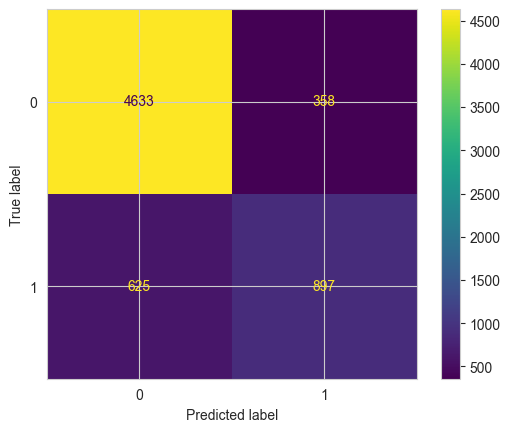

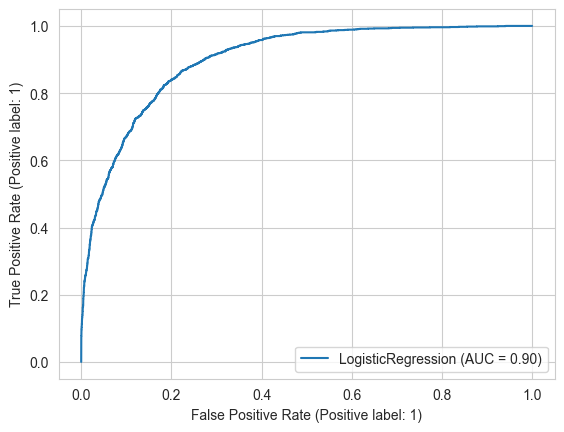

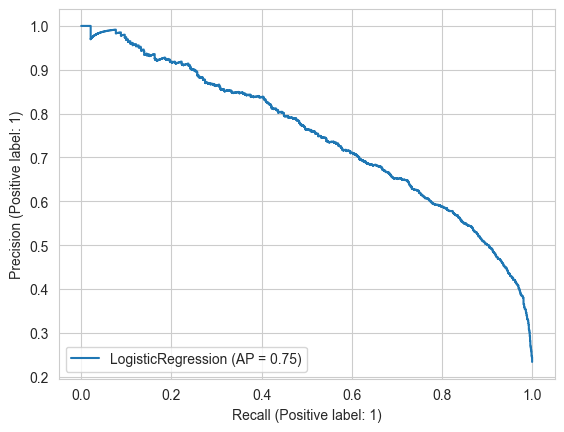

In [14]:
ConfusionMatrixDisplay.from_estimator(log_scaled, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(log_scaled, X_test_scaled, y_test)
PrecisionRecallDisplay.from_estimator(log_scaled, X_test_scaled, y_test)

In [7]:
from sklearn.model_selection import GridSearchCV

In [28]:
log_model = LogisticRegression(solver='saga', max_iter=int(1e+5))

penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0, 1, 5)
C = np.logspace(0, 10, 5)
param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': C}
log_grid = GridSearchCV(log_model, param_grid, n_jobs=-1, verbose=3)

In [29]:
log_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


D:\Desktop\ML_projects\AdultCensusIncomeClassification\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(max_iter=100000, solver='saga'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 3.16227766e+02, 1.00000000e+05, 3.16227766e+07,
       1.00000000e+10]),
                         'l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=3)

In [31]:
y_test_pred = log_grid.predict(X_test_scaled)
print('Acc is: ', accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Acc is:  0.85014586212191
[[4637  354]
 [ 622  900]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4991
           1       0.72      0.59      0.65      1522

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



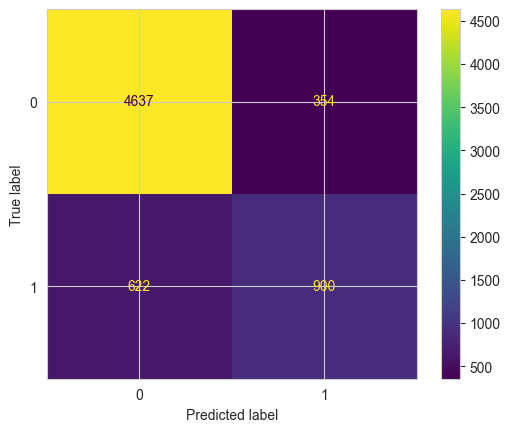

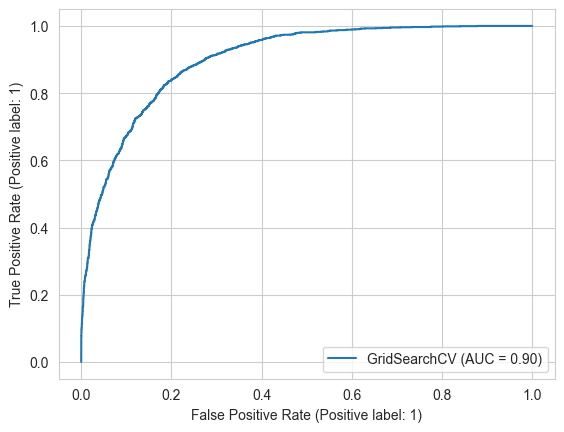

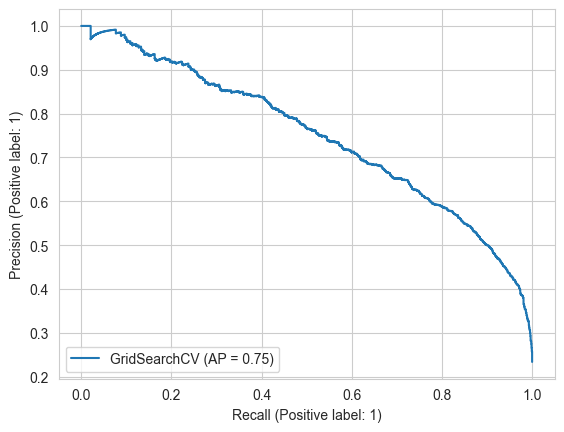

In [34]:
ConfusionMatrixDisplay.from_estimator(log_grid, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(log_grid, X_test_scaled, y_test)
PrecisionRecallDisplay.from_estimator(log_grid, X_test_scaled, y_test)

In [33]:
log_grid.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [37]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [41]:
test_error_rates = []
for n in range(1, 51):
    print(f'\rFitting KNN model with {n} neighbors.' + (' ' * 3), end='')
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train_scaled, y_train)
    acc = knn_model.score(X_test_scaled, y_test)
    test_error_rates.append(acc)

Fitting KNN model with 50 neighbors.   

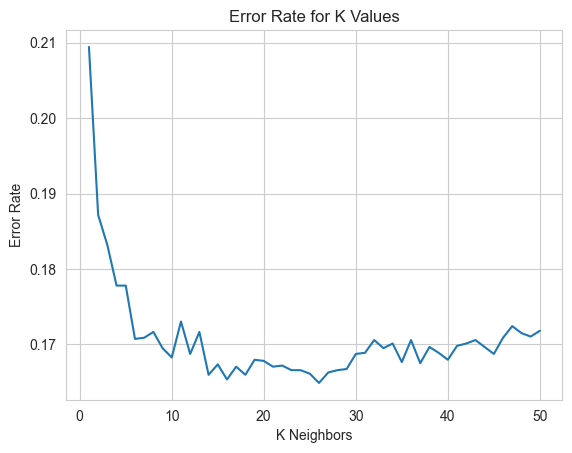

In [47]:
fig, ax = plt.subplots()
ax.plot(range(1, 51), 1 - np.array(test_error_rates))
ax.set(ylabel='Error Rate', xlabel='K Neighbors',
       title='Error Rate for K Values')
plt.show()

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train_scaled, y_train)
y_test_pred = knn_model.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4991
           1       0.67      0.57      0.61      1522

    accuracy                           0.83      6513
   macro avg       0.77      0.74      0.75      6513
weighted avg       0.83      0.83      0.83      6513



In [13]:
from sklearn.svm import SVC

In [14]:
svc_model = SVC()
grid_params = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf', 'linear']}
svc_grid = GridSearchCV(svc_model, grid_params, n_jobs=-2, verbose=2, cv=3)
svc_grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-2,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf', 'linear']},
             verbose=2)

In [18]:
svc_grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [17]:
y_test_pred = svc_grid.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4991
           1       0.72      0.57      0.64      1522

    accuracy                           0.85      6513
   macro avg       0.80      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513



### Tree Based Models

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
tree_model = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 30, 50, 100, 150, 300],
    'min_samples_split': [3, 5, 10],
    'min_impurity_decrease': np.logspace(-2, 0, 10)
}
tree_grid = GridSearchCV(tree_model, param_grid, verbose=3, n_jobs=-2)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 630 candidates, totalling 3150 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-2,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 30, 50, 100, 150, 300],
                         'min_impurity_decrease': array([0.01      , 0.01668101, 0.02782559, 0.04641589, 0.07742637,
       0.12915497, 0.21544347, 0.35938137, 0.59948425, 1.        ]),
                         'min_samples_split': [3, 5, 10]},
             verbose=3)

In [11]:
tree_grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_impurity_decrease': 0.01,
 'min_samples_split': 3}

In [13]:
y_test_pred = tree_grid.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4991
           1       0.75      0.51      0.60      1522

    accuracy                           0.84      6513
   macro avg       0.80      0.73      0.75      6513
weighted avg       0.84      0.84      0.83      6513



In [144]:
import xgboost as xgb

In [145]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4991
           1       0.77      0.64      0.70      1522

    accuracy                           0.87      6513
   macro avg       0.83      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513



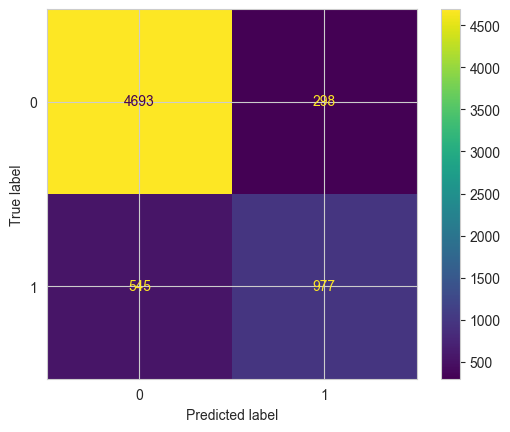

In [146]:
y_test_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_test_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

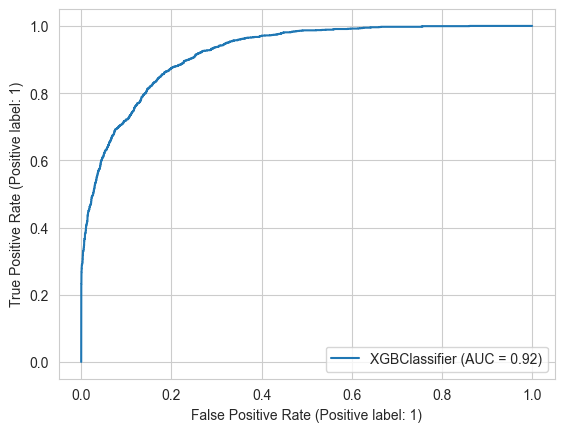

In [147]:
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)

In [148]:
from sklearn.metrics import roc_curve

In [157]:
fpr, tpr, thresholds = roc_curve(y_test.values,
                                 xgb_model.predict_proba(X_test)[:, 1])

In [162]:
pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Thresholds': thresholds})

,FPR,TPR,Thresholds
0,0.000000,0.000000,1.999974
1,0.000000,0.000657,0.999974
2,0.000000,0.015769,0.999719
3,0.000000,0.017083,0.999712
4,0.000000,0.055848,0.999363
...,...,...,...
1223,0.938089,1.000000,0.000130
1224,0.938890,1.000000,0.000128
1225,0.965939,1.000000,0.000065
1226,0.966339,1.000000,0.000065


              precision    recall  f1-score   support

           0       0.93      0.86      0.89      4991
           1       0.63      0.80      0.71      1522

    accuracy                           0.84      6513
   macro avg       0.78      0.83      0.80      6513
weighted avg       0.86      0.84      0.85      6513



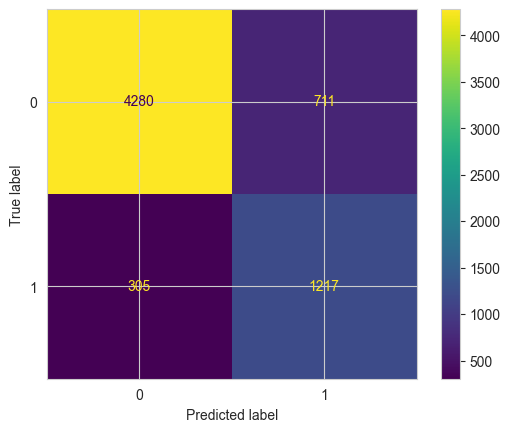

In [165]:
best_treshold = 0.283687
y_test_pred = np.int32((xgb_model.predict_proba(X_test)[:, 1] > best_treshold))
print(classification_report(y_test, y_test_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)


In [19]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
forest_model = RandomForestClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 50, 150, 300],
    'min_impurity_decrease': np.logspace(-2, 0, 4),
    'n_estimators': [50, 100, 200]
}
forest_grid = GridSearchCV(forest_model, param_grid, verbose=3, n_jobs=-2)
forest_grid.fit(X_train, y_train)

print(forest_grid.best_params_)
y_test_pred = forest_grid.predict(X_test)
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.01, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4991
           1       1.00      0.09      0.17      1522

    accuracy                           0.79      6513
   macro avg       0.89      0.55      0.52      6513
weighted avg       0.83      0.79      0.71      6513



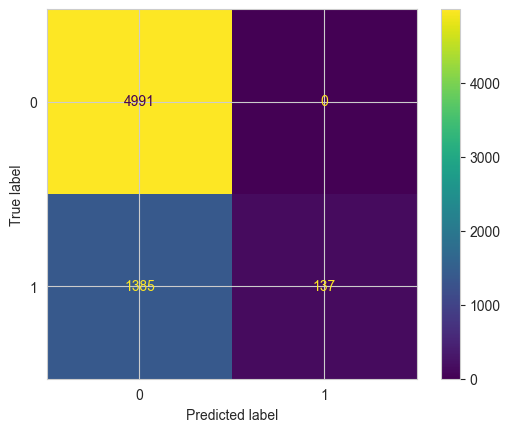

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4991
           1       0.74      0.60      0.66      1522

    accuracy                           0.86      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



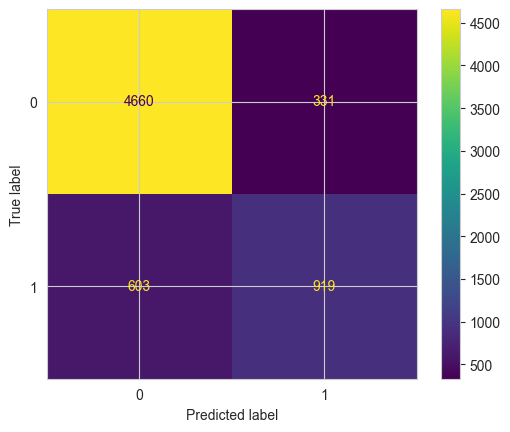

In [12]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

ada_model = AdaBoostClassifier()

ada_model.fit(X_train, y_train)

y_test_pred = ada_model.predict(X_test)
print(classification_report(y_test, y_test_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4991
           1       0.78      0.60      0.68      1522

    accuracy                           0.87      6513
   macro avg       0.83      0.77      0.80      6513
weighted avg       0.86      0.87      0.86      6513



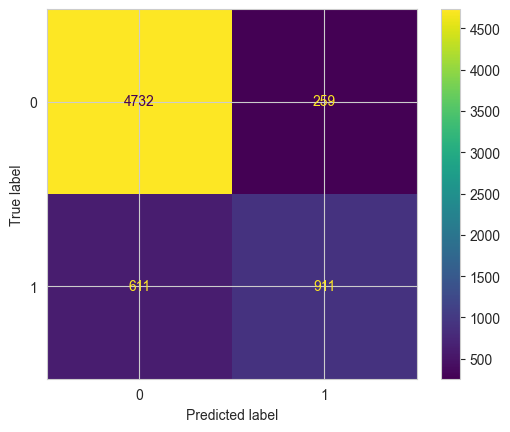

In [14]:
gb_model = GradientBoostingClassifier()

gb_model.fit(X_train, y_train)

y_test_pred = gb_model.predict(X_test)
print(classification_report(y_test, y_test_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

In [15]:
import tensorflow as tf

In [137]:
def model_init():
    inputs = tf.keras.Input(shape=(X_train_scaled.shape[1]))

    x = tf.keras.layers.Dense(12, "sigmoid")(inputs)
    x = tf.keras.layers.Dense(12, "sigmoid")(x)
    x = tf.keras.layers.Dense(12, "sigmoid")(x)

    outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    return tf.keras.Model(inputs=inputs, outputs=outputs)



In [141]:
model = model_init()


@tf.function
def weighted_binary_crossentropy(y_true, y_pred):
    return -tf.reduce_sum(
        2 * y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(
            1 - y_pred), axis=-1)


In [142]:
optimizer = tf.keras.optimizers.Adam(0.01)
metric = tf.keras.metrics.BinaryAccuracy(threshold=0.5)
model.compile(optimizer=optimizer, loss=weighted_binary_crossentropy,
              metrics=[metric])
history = model.fit(x=X_train_scaled, y=y_train.astype('float32'), epochs=30,
                    validation_data=(X_test_scaled, y_test.astype('float32')))

Epoch 1/30
814/814 [==============================] - 2s 2ms/step - loss: 0.5222 - binary_accuracy: 0.8108 - val_loss: 0.4851 - val_binary_accuracy: 0.8288
Epoch 2/30
814/814 [==============================] - 1s 1ms/step - loss: 0.4736 - binary_accuracy: 0.8252 - val_loss: 0.4929 - val_binary_accuracy: 0.8021
Epoch 3/30
814/814 [==============================] - 1s 1ms/step - loss: 0.4582 - binary_accuracy: 0.8345 - val_loss: 0.4752 - val_binary_accuracy: 0.8299
Epoch 4/30
814/814 [==============================] - 1s 1ms/step - loss: 0.4511 - binary_accuracy: 0.8377 - val_loss: 0.4839 - val_binary_accuracy: 0.8288
Epoch 5/30
814/814 [==============================] - 1s 2ms/step - loss: 0.4457 - binary_accuracy: 0.8375 - val_loss: 0.4778 - val_binary_accuracy: 0.8290
Epoch 6/30
814/814 [==============================] - 1s 1ms/step - loss: 0.4399 - binary_accuracy: 0.8394 - val_loss: 0.4806 - val_binary_accuracy: 0.8227
Epoch 7/30
814/814 [==============================] - 1s 1ms/ste

204/204 [==============================] - 0s 884us/step
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      4991
           1       0.61      0.75      0.67      1522

    accuracy                           0.83      6513
   macro avg       0.76      0.80      0.78      6513
weighted avg       0.85      0.83      0.84      6513



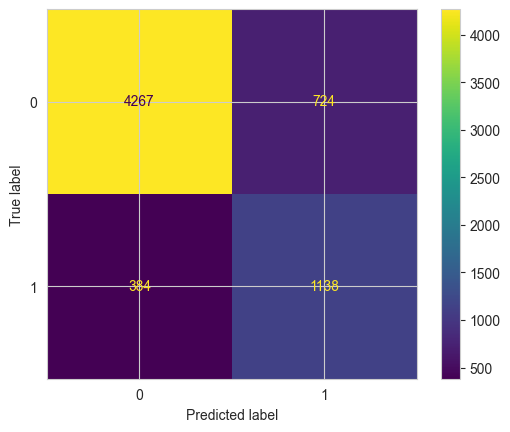

In [143]:
y_test_pred = np.int32(model.predict(X_test_scaled) > 0.5)
print(classification_report(y_test, y_test_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)